# Clustering Reviewer - Customer Transaction Dataset


**Welcome to Customer Segmentation with K-Means Clustering!**

**What are we trying to do?**

Imagine you work for a company that wants to understand their customers better. Instead of treating all 2,240 customers the same way, we want to group them into different segments (like "big spenders," "bargain hunters," or "occasional buyers"). This process is called **customer segmentation**.

**Our Goal**: Use a technique called K-Means Clustering to automatically group customers based on their shopping behaviors and demographics.

**Think of it like this**: If you had to organize a huge pile of mixed laundry, you'd naturally sort similar items together - all the shirts in one pile, pants in another, socks in another. K-Means does the same thing, but with customers!

### Tools/Libraries We'll Use
- **Pandas**: Think of this as a super-powered Excel for Python. It helps us work with data tables (called DataFrames)
- **NumPy**: A math helper that makes calculations faster and easier
- **Matplotlib** & **Seaborn**: These create beautiful charts and graphs to visualize our data
- **Scikit-learn**: Contains the K-Means algorithm (our clustering tool)

## Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

print("✅ All libraries imported successfully!")
print("We're ready to start our customer segmentation project!")

✅ All libraries imported successfully!
We're ready to start our customer segmentation project!


**What's happening here?**
- `import pandas as pd`: We're bringing in the pandas library and giving it a shorter nickname "pd" so we don't have to type "pandas" every time
- `import numpy as np`: Same thing with NumPy - "np" is much shorter to type!
- The `matplotlib` and `seaborn` imports bring in our plotting tools
- The print statements just confirm everything loaded properly

## Loading the Dataset


**Let's break this down:**
- `pd.read_csv()`: This function reads a CSV file (like a spreadsheet saved as text) and converts it into a DataFrame
- `df`: This is our DataFrame - think of it as a table with rows and columns, just like Excel
- `df.shape`: This tells us the dimensions of our table - how many rows and columns it has
- `df.shape[0]`: The number of rows (customers)
- `df.shape[1]`: The number of columns (pieces of information about each customer)

**Why use a DataFrame?**
A DataFrame is like a smart table that remembers what each column represents and can do mathematical operations on the data. It's much more powerful than a regular Excel spreadsheet!


In [8]:
# Load our customer data from the CSV file
df = pd.read_csv('cc_reviewer_customer_segmentation.csv')

print("📊 Dataset loaded successfully!")
print(f"Our dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print("\nWhat does this mean?")
print(f"• We have information about {df.shape[0]:,} customers")
print(f"• For each customer, we have {df.shape[1]} different pieces of information")

📊 Dataset loaded successfully!
Our dataset has 2240 rows and 29 columns

What does this mean?
• We have information about 2,240 customers
• For each customer, we have 29 different pieces of information


## Initial Dataset Exploration

**What's `.head()` doing?**
- `.head()` shows us the first 5 rows of our data by default
- Think of it like looking at the top of a stack of papers to see what's there
- This gives us a quick preview without overwhelming us with all 2,240 customers at once
- We can see the column names at the top and some sample data below

**What are we looking at?**
Each row represents one customer, and each column tells us something about that customer:
- **ID**: A unique number for each customer (like a customer ID badge)
- **Year_Birth**: What year the customer was born
- **Education**: Their education level
- **Income**: How much money they make per year
- **MntWines**: How much they spent on wines
- And many more columns with purchasing and demographic information!

If you want to explore the dataset further, feel free to explore it [here](https://www.kaggle.com/datasets/vishakhdapat/customer-segmentation-clustering)

In [ ]:
# Let's peek at the first 5 rows of our data
print("👀 Here's what our data looks like:")
print("(Showing the first 5 customers)")
print("=" * 50)

# Display the first 5 rows
df.head()

### Exploring Data Structure using `df.info()`

**What does `df.info()` tell us?**

When you run this, you'll see several important pieces of information:

1. **RangeIndex**: Shows us we have customers indexed from 0 to 2239 (that's 2,240 total)

2. **Data columns**: Lists all 29 columns in our dataset

3. **Non-Null Count**: For each column, this tells us how many values are NOT missing
   - If a column has 2240 non-null values, it means no data is missing
   - If it has fewer (like 2216), it means some customers are missing that information

4. **Dtype**: The data type of each column
   - `int64`: Whole numbers (like age, number of purchases)
   - `float64`: Decimal numbers (like income)
   - `object`: Text/strings (like education level, marital status)

**Why is this important?**
Before we can analyze our data, we need to know:
- What type of information we have (numbers vs. text)
- Whether we're missing any important data
- How much data we're working with


In [ ]:
# Get detailed information about our dataset
print("🔍 Detailed Information About Our Dataset")
print("=" * 50)

# This shows us data types, non-null counts, and memory usage
df.info()

### Exploring Missing Values
Please Fill in the Missing Code Snippets

In [ ]:
# Let's explicitly check for missing values in each column
print("🕵️ Missing Values Detective Work")
print("=" * 40)

# Count missing values for each column (HINT : Use a combination of `isnull` and `sum`)
missing_values = # INSERT CODE HERE

# Show the results
print("Missing values per column:")
print(missing_values)

print(f"\n📊 Summary:")
print(f"• Total cells in our dataset: {df.shape[0] * df.shape[1]:,}")
print(f"• Total missing values: {missing_values.sum():,}")

# Calculate the Percentage Of Missing Data!
# INSERT CODE HERE
# print(f"• Percentage of missing data: {(missing_values.sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

# Show only columns that have missing values
if missing_values.sum() > 0:
    print(f"\n⚠️ Columns with missing values:")
    columns_with_missing = missing_values[missing_values > 0]
    for column, count in columns_with_missing.items():
        print(f"   • {column}: {count} missing values")
else:
    print(f"\n✅ Great news! No missing values found!")

**Let's break down this code step by step:**

1. **`df.isnull()`**: This checks every single cell in our DataFrame and returns `True` if it's missing (null) or `False` if it has data
   - Think of it like going through every cell with a highlighter and marking the empty ones

2. **`.sum()`**: This counts up all the `True` values (missing data) for each column
   - It's like counting how many highlighted cells are in each column

3. **`missing_values.sum()`**: This adds up ALL the missing values across the entire dataset
   - It's our grand total of missing information

**Why do we care about missing values?**
- Missing data can mess up our analysis and clustering
- We need to know if we should fill in missing values or remove those customers
- Some machine learning algorithms can't work with missing data

**What might we find?**
Based on our dataset, we might discover that some customers didn't provide their income information, or maybe some demographic details are missing. This is totally normal in real-world data!

## Data Cleaning and EDA (Exploratory Data Analysis)

### 🧹 Time to Clean Our Data!

**Why is data cleaning so important?**

Think about baking a cake - you wouldn't use expired milk, cracked eggs, or measure flour with a broken scale, right? The same goes for data analysis! We can't get good insights from messy, incomplete, or incorrect data.

**What is data cleaning?**
Data cleaning is the process of:
- Fixing or removing incorrect data
- Handling missing values
- Making sure our data is consistent and ready for analysis

**Real-world analogy:** Imagine you're a detective investigating a case, but some witness statements are missing, some have conflicting information, and some testimonies are incomplete. Before you can solve the case, you need to organize and clean up all the evidence!

**What we'll do in this section:**
1. Handle any missing values we found
2. Check for any obvious errors or outliers
3. Prepare our data for the clustering analysis

Let's get started!

### Handling Missing Values

In [ ]:
# Let's look at our missing values again and decide what to do
print("🔍 Current Missing Values Status:")
missing_values = df.isnull().sum()
columns_with_missing = # INSERT CODE HERE (HINT : USE A FILTER ON `missing_values`)
# missing_values[missing_values > 0]

if len(columns_with_missing) > 0:
    print("\nColumns with missing values:")
    for column, count in columns_with_missing.items():
        percentage = (count / len(df)) * 100
        print(f"   • {column}: {count} missing ({percentage:.1f}% of data)")
    
    print(f"\n🤔 Decision Time: How should we handle missing values?")
    print("Our rule of thumb:")
    print("   • Less than 5% missing → Fill with average/most common value")
    print("   • More than 5% missing → Consider removing those rows or columns")
    
    # For this dataset, let's handle Income missing values (if any)
    # We'll fill missing Income with the median (middle value)
    if 'Income' in columns_with_missing.index:
        print(f"\n💰 Handling missing Income values...")
        median_income = df['Income'].median()
        print(f"   • Median income: ${median_income:,.2f}")
        print(f"   • Filling {df['Income'].isnull().sum()} missing values with median")
        
        df['Income']. # INSERT CODE TO FILLNA with `median_income`
        #df['Income'].fillna(median_income, inplace=True)
        
        print("   ✅ Income missing values filled!")
    
    # Remove any rows with missing values (if very few)
    rows_before = len(df)
    df_clean = # INSERT CODE TO DROPNA
    # df_clean = df.dropna()
    rows_after = len(df_clean)
    rows_removed = rows_before - rows_after
    
    if rows_removed > 0:
        print(f"\n🧹 Removed {rows_removed} rows with missing values")
        print(f"   • Before: {rows_before:,} customers")
        print(f"   • After: {rows_after:,} customers")
        print(f"   • Removed: {(rows_removed/rows_before)*100:.1f}% of data")
        df = df_clean.copy()
    
else:
    print("✅ Great! No missing values found - our data is already clean!")

print(f"\n🎉 Data cleaning complete!")
print(f"Final dataset: {df.shape[0]:,} customers with {df.shape[1]} features each")

**Let's understand our missing value strategy:**

**Why use median for Income?**
- **Mean (average)**: Can be affected by extremely high or low values
- **Median (middle value)**: The income that's right in the middle when all incomes are sorted - more realistic for income data
- Think of it like this: If Bill Gates walks into a coffee shop, the average wealth shoots up dramatically, but the median stays realistic!

**Why remove rows with less than 5% missing data?**
- If only a few customers have missing information, it's often better to exclude them
- This keeps our analysis clean without losing too much valuable data
- It's like removing a few damaged pieces from a 1000-piece puzzle - you still get the complete picture

**`fillna()` and `dropna()` explained:**
- `fillna(value)`: Fills missing values with whatever value you specify
- `dropna()`: Removes any rows that have missing values
- `inplace=True`: Makes the change permanent to our DataFrame

###  Introduction to EDA (Exploratory Data Analysis)

**What is EDA?**
EDA stands for **Exploratory Data Analysis** - it's like being a detective investigating a mystery, but instead of looking for clues about a crime, we're looking for patterns and insights in our data!

**Think of it this way:**
- A detective examines evidence from different angles
- They look for patterns, unusual things, and connections
- They ask questions like "What's normal?" and "What stands out?"
- They gather all this information before drawing conclusions

**That's exactly what we're going to do with our customer data!**

**Our EDA Investigation Plan:**
1. **Get the basic facts** - What do our numbers look like overall? (using `df.describe()`)
2. **Look for patterns** - How are different features distributed?
3. **Find relationships** - Do certain characteristics go together?
4. **Spot outliers** - Are there any unusual customers that stand out?

**Why is EDA so important?**
- It helps us understand our data before we start clustering
- It reveals insights that might not be obvious from just looking at numbers
- It helps us choose the right approach for our analysis
- It's like getting to know your ingredients before cooking a meal!


In [9]:
# Let's get the basic facts about our numerical data
print("📊 CUSTOMER DATA INVESTIGATION REPORT")
print("="*50)

# Get summary statistics for all numerical columns
summary_stats = df.describe()

# Display the summary
print("Summary Statistics for all numerical features:")
summary_stats

📊 CUSTOMER DATA INVESTIGATION REPORT
Summary Statistics for all numerical features:


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


**What does `df.describe()` show us?**

Let's break down each row of statistics:

1. **count**: How many customers we have data for (should be the same for all columns if no missing values)

2. **mean**: The average value
   - *Example*: If average income is $50,000, that's what a "typical" customer earns

3. **std** (standard deviation): How spread out the values are
   - *Small std*: Most customers are similar (like everyone earning $40K-$60K)
   - *Large std*: Customers are very different (some earn $20K, others $200K)

4. **min**: The smallest value in that column
   - *Example*: The customer who spent the least amount

5. **25%** (first quartile): The value that 25% of customers are below
   - *Example*: If 25% quartile for wine spending is $50, then 1 out of 4 customers spent less than $50 on wine

6. **50%** (median): The middle value - exactly half of customers are above and below this
   - *This is often more realistic than the mean for understanding "typical" customers*

7. **75%** (third quartile): The value that 75% of customers are below
   - *Example*: If 75% quartile is $200, then 3 out of 4 customers spent less than $200

8. **max**: The largest value - our "biggest spender" or highest value

**Real-world analogy:** It's like getting a report card for each subject, but instead of grades, we're getting a summary of how all students performed!

### 📊 Our First Chart: Customer Ages

**What are we plotting?**
We're going to create a histogram showing the distribution of customer ages. Since we have birth years, we'll first calculate ages from those years.

**Why plot customer ages?**
- Age often influences purchasing behavior
- It helps us understand our customer base demographics  
- We can spot if we have mostly young customers, older customers, or a good mix
- It might reveal interesting patterns for our clustering later

**What to expect:**
We'll see a bar chart where:
- The x-axis shows age ranges (like 30-35, 35-40, etc.)
- The y-axis shows how many customers fall in each age range
- Tall bars = many customers of that age
- Short bars = fewer customers of that age

In [10]:
# First, let's calculate customer ages from birth years
# We'll assume the current year is 2024 for this calculation
current_year = 2024
df['Age'] = current_year - df['Year_Birth']

In [ ]:
print(f"👥 Customer Age Analysis:")
print(f"   • Youngest customer: {df['Age'].min()} years old")
print(f"   • Oldest customer: {df['Age'].max()} years old") 
print(f"   • Average customer age: {df['Age'].mean():.1f} years old")
print(f"   • Most common age range: We'll see this in our chart!")

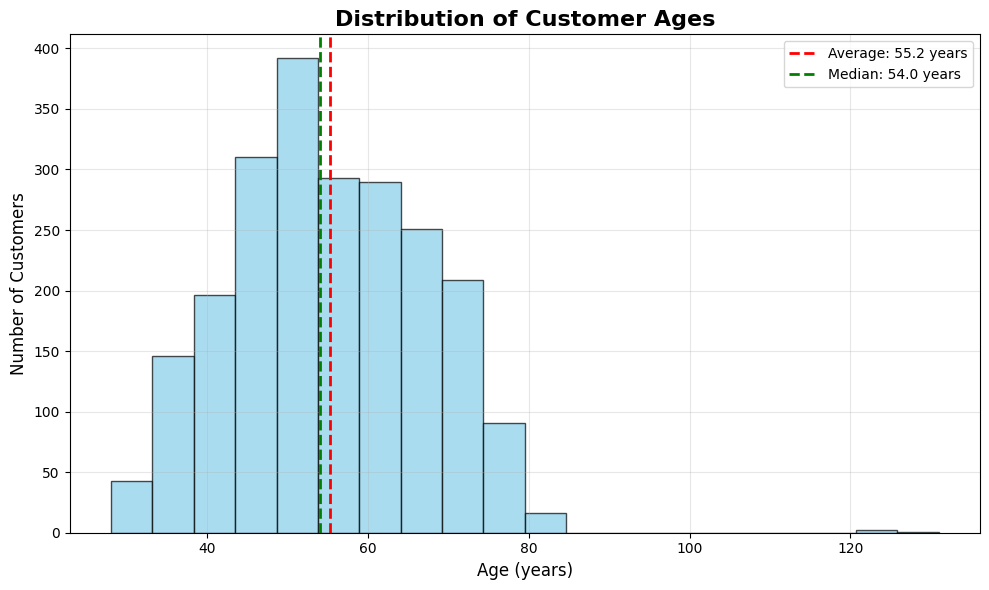

In [ ]:
# Create a histogram of customer ages
plt.figure(figsize=(10, 6))
# INSERT CODE HERE -> Create the Histogram of the Age Column
# plt.hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Distribution of Customer Ages', fontsize=16, fontweight='bold')
plt.xlabel('Age (years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3)

# Add some helpful statistics to the plot
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f"Average: {df['Age'].mean():.1f} years")
plt.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df['Age'].median():.1f} years")
plt.legend()

plt.tight_layout()
plt.show()


**Code Breakdown:**
- `current_year - df['Year_Birth']`: Subtracts birth year from current year to get age
- `plt.figure(figsize=(10, 6))`: Creates a chart that's 10 inches wide and 6 inches tall
- `plt.hist()`: Creates a histogram (bar chart for continuous data)
- `bins=20`: Divides the age range into 20 groups/bars
- `alpha=0.7`: Makes bars slightly transparent so they look better
- `plt.axvline()`: Draws vertical lines for average and median

#### 🔍 What Does Our Age Chart Tell Us?

Look at the chart above and ask yourself these detective questions:

**Shape Analysis:**
- **Is it bell-shaped (normal)?** Most customers around middle age, fewer very young/old
- **Is it skewed left?** More older customers than younger ones  
- **Is it skewed right?** More younger customers than older ones
- **Are there multiple peaks?** Maybe we have distinct age groups

**Key Insights to Look For:**
1. **Where is the highest bar?** This is our most common customer age group
2. **How spread out are the ages?** Wide spread = diverse ages, narrow = similar ages
3. **Any gaps or unusual patterns?** Missing age groups might be interesting
4. **Red vs Green line:** If average and median are very different, we might have some extreme values

**Business Implications:**
- **Younger customers** might prefer online shopping and social media marketing
- **Older customers** might prefer traditional marketing and in-store experiences
- **Mixed ages** suggest we need diverse marketing strategies

**For Clustering:** Age will be one factor that helps group similar customers together!

### Customer Income Distribution

#### 💰 Let's Investigate Customer Income Levels

**What are we plotting next?**
Customer income distribution - this is crucial because spending power directly affects purchasing behavior!

**Why income matters for clustering:**
- High-income customers might buy premium products
- Lower-income customers might be more price-sensitive  
- Income often correlates with other behaviors (catalog vs online shopping, etc.)

**What we'll learn:**
- Do we have mostly middle-class customers?
- Are there wealthy outliers who might skew our analysis?
- Is income evenly distributed or clustered around certain levels?


In [14]:
# Let's examine customer income distribution
print("💰 Customer Income Analysis:")
print(f"   • Lowest income: ${df['Income'].min():,.2f}")
print(f"   • Highest income: ${df['Income'].max():,.2f}")
print(f"   • Average income: ${df['Income'].mean():,.2f}")
print(f"   • Median income: ${df['Income'].median():,.2f}")

💰 Customer Income Analysis:
   • Lowest income: $1,730.00
   • Highest income: $666,666.00
   • Average income: $52,247.25
   • Median income: $51,381.50


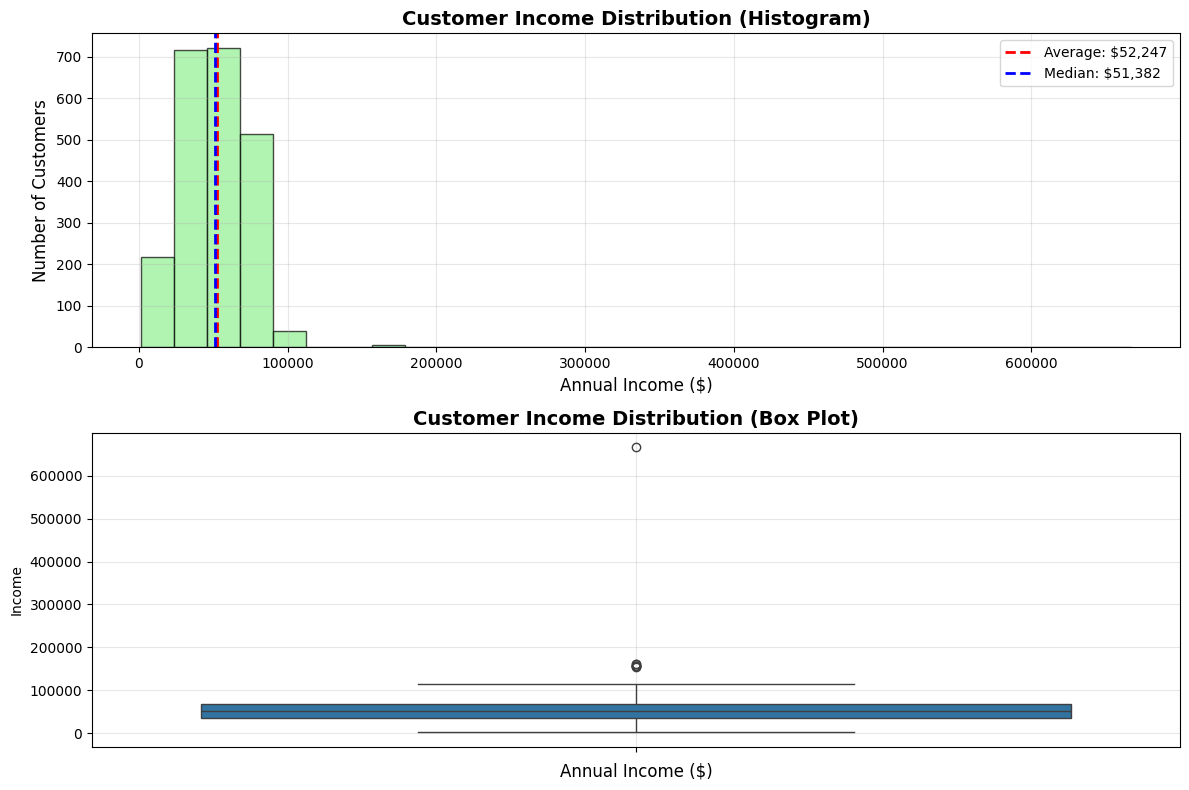

In [ ]:
# Create income distribution plot
plt.figure(figsize=(12, 8))

# Create subplot with 2 charts side by side
plt.subplot(2, 1, 1)
# Histogram
# Insert Code for Plotting Income Column via a Histogram with 30 bins
# plt.hist(df['Income'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
plt.title('Customer Income Distribution (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.axvline(df['Income'].mean(), color='red', linestyle='--', linewidth=2, label=f'Average: ${df["Income"].mean():,.0f}')
plt.axvline(df['Income'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: ${df["Income"].median():,.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Box plot to better see outliers
plt.subplot(2, 1, 2)
# Insert Code for Plotting Income Column via a Box Plot
sns.boxplot(df.Income) # NOTE : If you use Seaborn instead of Matplotlib, its easier to create boxplots since you dont have to transform your data
plt.title('Customer Income Distribution (Box Plot)', fontsize=14, fontweight='bold')
plt.xlabel('Annual Income ($)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [30]:
# Identify potential high-income outliers
income_75th = df['Income'].quantile(0.75)
income_q3_plus_iqr = income_75th + (income_75th - df['Income'].quantile(0.25)) * 1.5
high_income_customers = df[df['Income'] > income_q3_plus_iqr]

print(f"\n🎯 Income Insights:")
print(f"   • We have {len(high_income_customers)} customers with unusually high incomes")
print(f"   • These 'premium' customers earn more than ${income_q3_plus_iqr:,.0f}")
print(f"   • This represents {(len(high_income_customers)/len(df))*100:.1f}% of our customer base")


🎯 Income Insights:
   • We have 8 customers with unusually high incomes
   • These 'premium' customers earn more than $118,350
   • This represents 0.4% of our customer base


**Understanding the Two Charts:**

**Histogram (Top Chart):**
- Shows the distribution shape
- Each bar represents an income range and how many customers fall in it
- Red line = average income, Blue line = median income

**Box Plot (Bottom Chart):**
- The box shows the middle 50% of customers (25th to 75th percentile)
- The line inside the box is the median
- The "whiskers" (lines extending from box) show the normal range
- Dots outside the whiskers are potential outliers (unusually high/low incomes)

**What the code calculates:**
- We find customers who earn significantly more than typical (outliers)
- These might be our "premium" customers who behave very differently


### Total Spending Analysis
#### 🛒 How Much Do Customers Actually Spend?

**Our next investigation:** Let's look at total customer spending across all product categories.

**Why total spending matters:**
- It's a key indicator for customer segmentation
- High spenders vs. low spenders probably behave very differently
- It helps us identify our most valuable customers

**What we'll do:**
We'll add up all the "Mnt" (amount) columns to get each customer's total spending, then visualize the distribution.



🛒 Calculating Total Customer Spending...
Adding up spending on:
   • MntWines: Average $304 per customer
   • MntFruits: Average $26 per customer
   • MntMeatProducts: Average $167 per customer
   • MntFishProducts: Average $38 per customer
   • MntSweetProducts: Average $27 per customer
   • MntGoldProds: Average $44 per customer

💳 Total Spending Statistics:
   • Lowest spender: $5.00
   • Highest spender: $2,525.00
   • Average spending: $605.80
   • Median spending: $396.00


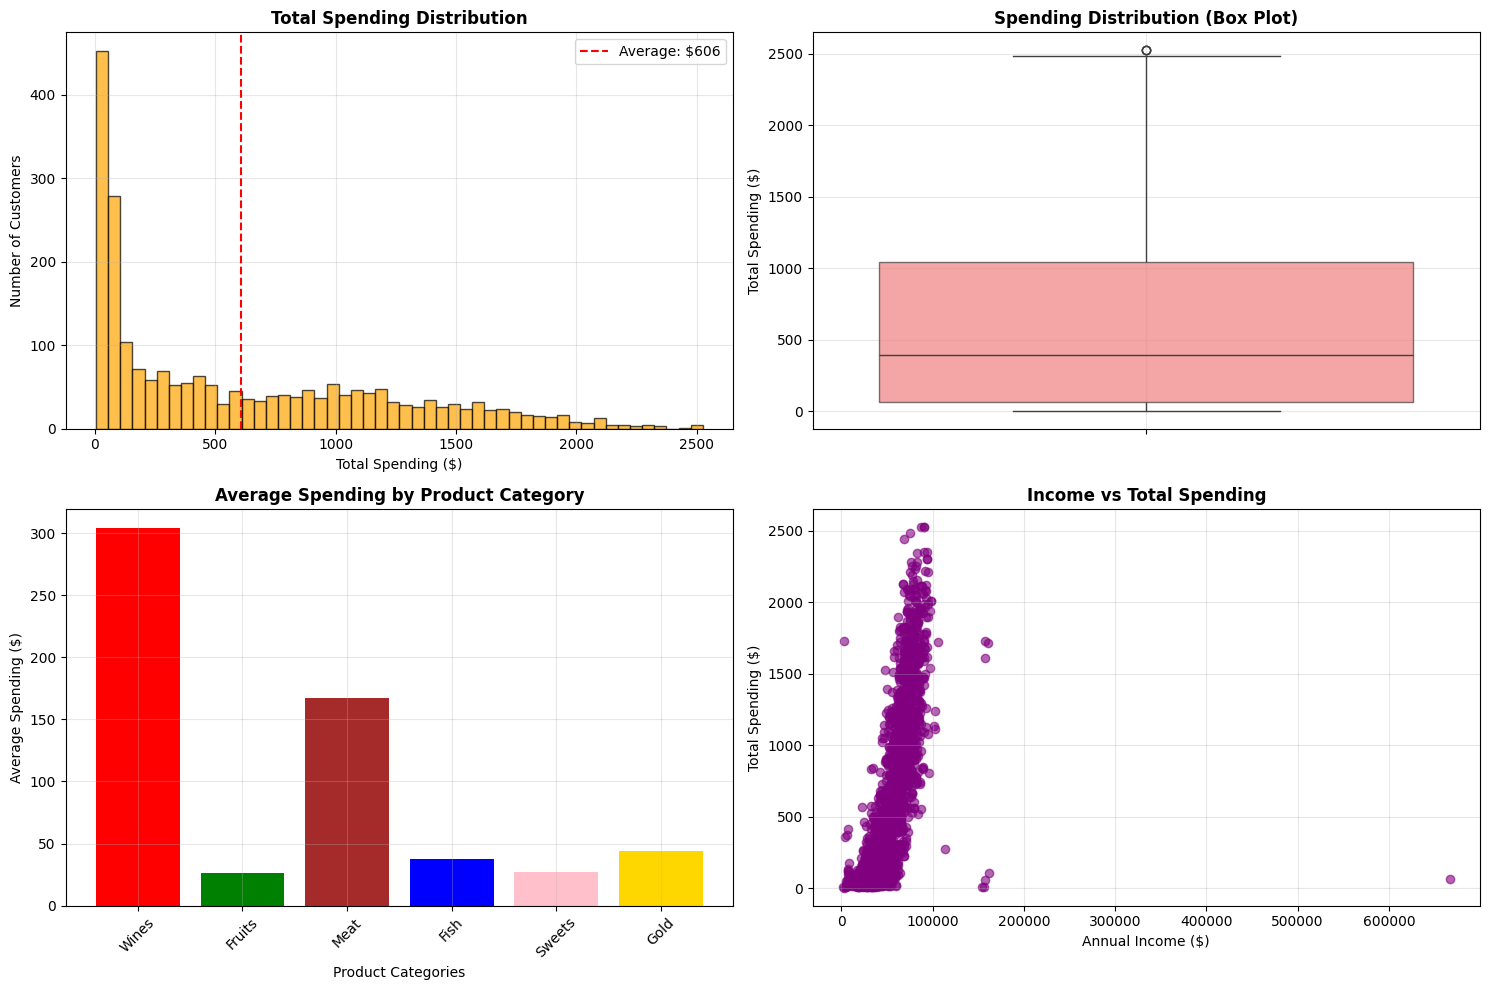


🎯 Spending Segments (Manual Analysis):
   • Low Spenders (bottom 33%): 739 customers, avg spending $50
   • Medium Spenders (middle 33%): 762 customers, avg spending $414
   • High Spenders (top 33%): 739 customers, avg spending $1359


In [31]:
# Calculate total spending for each customer
# We'll add up all the 'Mnt' (amount) columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

print("🛒 Calculating Total Customer Spending...")
print("Adding up spending on:")
for col in spending_columns:
    print(f"   • {col}: Average ${df[col].mean():.0f} per customer")

# Create total spending column
df['TotalSpending'] = df[spending_columns].sum(axis=1)

print(f"\n💳 Total Spending Statistics:")
print(f"   • Lowest spender: ${df['TotalSpending'].min():,.2f}")
print(f"   • Highest spender: ${df['TotalSpending'].max():,.2f}")
print(f"   • Average spending: ${df['TotalSpending'].mean():,.2f}")
print(f"   • Median spending: ${df['TotalSpending'].median():,.2f}")

# Create spending visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Overall distribution
plt.subplot(2, 2, 1)

# INSERT CODE HERE - Histogram of TotalSpending with 50 Bins
plt.hist(df['TotalSpending'], bins=50, color='orange', alpha=0.7, edgecolor='black')

plt.title('Total Spending Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Total Spending ($)')
plt.ylabel('Number of Customers')
plt.axvline(df['TotalSpending'].mean(), color='red', linestyle='--', label=f'Average: ${df["TotalSpending"].mean():.0f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Box plot
plt.subplot(2, 2, 2)

# INSERT CODE HERE - Box Plot of Total Spending
sns.boxplot(df['TotalSpending'], patch_artist=True, boxprops=dict(facecolor='lightcoral', alpha=0.7))

plt.title('Spending Distribution (Box Plot)', fontsize=12, fontweight='bold')
plt.ylabel('Total Spending ($)')
plt.grid(True, alpha=0.3)

# Subplot 3: Spending by category breakdown
plt.subplot(2, 2, 3)
category_averages = df[spending_columns].mean()

# INSERT CODE HERE - Bar Plot of Average Spending by Category use the colors : ['red', 'green', 'brown', 'blue', 'pink', 'gold']
plt.bar(range(len(category_averages)), category_averages, color=['red', 'green', 'brown', 'blue', 'pink', 'gold'])

plt.title('Average Spending by Product Category', fontsize=12, fontweight='bold')
plt.xlabel('Product Categories')
plt.ylabel('Average Spending ($)')
plt.xticks(range(len(spending_columns)), ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], rotation=45)
plt.grid(True, alpha=0.3)

# Subplot 4: Income vs Spending scatter plot
plt.subplot(2, 2, 4)

# INSERT CODE HERE - Scatter Plot of Income vs Total Spending
plt.scatter(df['Income'], df['TotalSpending'], alpha=0.6, color='purple')

plt.title('Income vs Total Spending', fontsize=12, fontweight='bold')
plt.xlabel('Annual Income ($)')
plt.ylabel('Total Spending ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify customer spending segments

# INSERT CODE HERE - Calculate Spending Segments e.g. `low_spenders`, `medium_spenders`, `high_spenders`
low_spenders = df[df['TotalSpending'] < df['TotalSpending'].quantile(0.33)]
medium_spenders = df[(df['TotalSpending'] >= df['TotalSpending'].quantile(0.33)) & 
                    (df['TotalSpending'] < df['TotalSpending'].quantile(0.67))]
high_spenders = df[df['TotalSpending'] >= df['TotalSpending'].quantile(0.67)]

print(f"\n🎯 Spending Segments (Manual Analysis):")
print(f"   • Low Spenders (bottom 33%): {len(low_spenders)} customers, avg spending ${low_spenders['TotalSpending'].mean():.0f}")
print(f"   • Medium Spenders (middle 33%): {len(medium_spenders)} customers, avg spending ${medium_spenders['TotalSpending'].mean():.0f}")  
print(f"   • High Spenders (top 33%): {len(high_spenders)} customers, avg spending ${high_spenders['TotalSpending'].mean():.0f}")

**What each chart shows:**

1. **Histogram (top-left)**: Overall shape of spending distribution
2. **Box Plot (top-right)**: Outliers and quartile ranges  
3. **Category Breakdown (bottom-left)**: Which products customers spend most on
4. **Income vs Spending (bottom-right)**: Do higher earners spend more?

**Code Explanation:**
- `.sum(axis=1)`: Adds up values across columns for each row (customer)
- `quantile(0.33)`: Finds the value that 33% of customers are below
- The scatter plot helps us see if there's a relationship between income and spending

### 🔍 What Have We Discovered So Far?

**Our Data Detective Summary:**

Before we move to clustering, let's summarize the key patterns we've discovered:

**Customer Demographics:**
- Age range and distribution patterns
- Income levels and potential outliers
- Any obvious demographic segments

**Spending Behavior:**
- Total spending distribution  
- Most popular product categories
- Relationship between income and spending

**Data Quality:**
- Our data is clean and ready for analysis
- We understand the scale and distribution of our key features

**Next Steps:**
These insights will help us choose the right features for clustering and interpret our results. We're now ready to let the K-Means algorithm automatically discover customer segments based on these patterns!

Ready to move on to the exciting part - the actual clustering analysis? 🚀

## Data Preprocessing for K-Means Clustering

### ⚖️ The Critical Problem: Why K-Means Gets Confused Without Preprocessing

**Here's the big problem we need to solve:**

K-Means clustering works by measuring the **distance** between customers to group similar ones together. But imagine trying to measure distance when your ruler is broken!

**The Real-World Analogy:**
Imagine you're organizing a sports tournament and trying to group athletes by their abilities. You have two measurements:
- **Age**: ranges from 20 to 70 years
- **Income**: ranges from $30,000 to $200,000

Now, when K-Means calculates how "similar" two customers are, it treats a difference of 10 years in age the same as a difference of $10 in income. But clearly, $10 is tiny compared to the income ranges, while 10 years is significant for age!

**What happens without preprocessing:**
```
Customer A: Age 25, Income $50,000
Customer B: Age 35, Income $51,000
```

K-Means calculates distance as: √[(35-25)² + (51000-50000)²] = √[100 + 1,000,000] ≈ 1,000

The algorithm thinks the $1,000 income difference is 10 times more important than the 10-year age difference, just because the numbers are bigger!

**The Solution: Preprocessing**
We need to put all our features on a "level playing field" so that:
- Age differences and income differences are measured fairly
- No single feature dominates just because it has bigger numbers
- K-Means can find meaningful patterns, not just patterns driven by number scale

**Think of it like this:** Before comparing athletes, we convert all measurements to percentiles or scores out of 10, so speed, strength, and endurance are all equally weighted in our grouping decision.



### Understanding Scaling Methods

### 📏 Two Ways to Level the Playing Field

Now that we understand WHY we need scaling, let's learn about the two most common methods:

#### **Method 1: StandardScaler (The "Grading on a Curve" Method)**

**What it does:**
- Rescales data to have a mean of 0 and standard deviation of 1
- This is like "grading on a curve" in school

**The Grading Analogy:**
Imagine a test where:
- Class average: 75 points
- Your score: 85 points
- Standard deviation: 10 points

StandardScaler would convert your 85 to: (85 - 75) / 10 = +1.0
This means "you scored 1 standard deviation above average"

**When to use StandardScaler:**
- ✅ When your data is roughly **bell-shaped** (normally distributed)
- ✅ When you want to preserve the shape of the distribution
- ✅ When your data doesn't have hard boundaries

**Example:** Income, age, spending amounts often work well with StandardScaler

#### **Method 2: MinMaxScaler (The "Converting to Percentages" Method)**

**What it does:**
- Squashes all values into a fixed range, usually 0 to 1
- Like converting all test scores to percentages from 0% to 100%

**The Percentage Analogy:**
Imagine test scores ranging from 40 to 95 points:
- Lowest score (40) becomes 0% (or 0.0)
- Highest score (95) becomes 100% (or 1.0)  
- A score of 67.5 becomes 50% (or 0.5) - exactly in the middle

Formula: (your_score - minimum_score) / (maximum_score - minimum_score)

**When to use MinMaxScaler:**
- ✅ When your data is **NOT normally distributed** (skewed, has multiple peaks)
- ✅ When your data has clear boundaries (like percentages, ratings)
- ✅ When you want all features to be bounded between 0 and 1

**Example:** Ratings (1-5 stars), percentages, counts often work well with MinMaxScaler

In [ ]:
# First, let's examine the distribution of our key numerical features
print("🔍 Analyzing our data distributions to choose the right scaler...")

# Select the numerical features we want to use for clustering
numerical_features = ['Age', 'Income', 'TotalSpending', 'Recency', 
                     'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Look at the distributions
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, feature in enumerate(numerical_features):
    axes[i].hist(df[feature], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

# Hide the last subplot since we have 7 features
axes[7].set_visible(False)

plt.tight_layout()
plt.show()

print("\n🤔 Decision Time: Which scaler should we use?")
print("Looking at our distributions above:")
print("   • Most features are NOT perfectly bell-shaped (normal)")
print("   • Several features are right-skewed (long tail on the right)")
print("   • We have features with very different scales")
print("\n✅ Decision: We'll use MinMaxScaler")
print("   • It works well with skewed data")
print("   • It gives us nice 0-1 bounded features")
print("   • It's easier to interpret (0 = minimum, 1 = maximum)")


In [ ]:
# Import and apply MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Create the scaler
scaler = MinMaxScaler()

print(f"\n⚙️ Applying MinMaxScaler to our features...")

# Create a copy of our data for scaling
df_scaled = df.copy()

# Apply scaling to our selected numerical features
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

print("✅ Scaling complete!")

# Let's compare before and after scaling
print(f"\n📊 Before and After Comparison:")
print("BEFORE scaling (original values):")
print(df[numerical_features].describe().round(2))

print(f"\nAFTER scaling (0-1 range):")
print(df_scaled[numerical_features].describe().round(3))

# Visualize the scaling effect
plt.figure(figsize=(15, 10))

# Before scaling
plt.subplot(2, 1, 1)
df[numerical_features].boxplot(ax=plt.gca())
plt.title('BEFORE Scaling: Notice the Different Scales', fontsize=14, fontweight='bold')
plt.ylabel('Original Values')
plt.xticks(rotation=45)

# After scaling  
plt.subplot(2, 1, 2)
df_scaled[numerical_features].boxplot(ax=plt.gca())
plt.title('AFTER Scaling: All Features Now Between 0 and 1', fontsize=14, fontweight='bold')
plt.ylabel('Scaled Values (0-1)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\n🎯 What scaling accomplished:")
print(f"   • All features now range from 0 to 1")
print(f"   • No single feature dominates due to scale")
print(f"   • K-Means can now measure distances fairly across all features")
print(f"   • Each customer's values are now comparable across different measurements")


**Code Breakdown:**

**Why we visualized distributions first:**
- Different scalers work better for different distribution shapes
- We need to see if our data is bell-shaped (StandardScaler) or skewed (MinMaxScaler)

**`fit_transform()` explained:**
- `fit`: The scaler learns the minimum and maximum values from our data
- `transform`: It applies the scaling formula to convert values to 0-1 range
- `fit_transform`: Does both steps at once

**What the before/after comparison shows:**
- Original data: Features have wildly different scales
- Scaled data: All features nicely bounded between 0 and 1

## Handling Categorical Features

### 🏷️ What About Text Categories? (Education, Marital Status, etc.)

**The Challenge:**
K-Means is a mathematical algorithm that only understands numbers, but our dataset has text categories like:
- Education: "Graduation", "PhD", "Master", etc.
- Marital Status: "Single", "Married", "Together", etc.

**We need to convert these text categories into numbers, but how?**



#### **Method 1: OneHotEncoding (The "Survey Question" Method)**

**What it does:**
Converts one category column into multiple binary (0/1) columns.

**The Survey Analogy:**
Instead of asking: "What's your favorite fruit?" with answers "Apple", "Orange", "Banana"

We create separate yes/no questions:
- "Do you like Apples?" → 1 for yes, 0 for no
- "Do you like Oranges?" → 1 for yes, 0 for no  
- "Do you like Bananas?" → 1 for yes, 0 for no

**Example transformation:**
```
Original:           After OneHotEncoding:
Education           Education_Graduation  Education_Master  Education_PhD
"Graduation"   →         1                    0               0
"Master"       →         0                    1               0
"PhD"          →         0                    0               1
```

**When to use OneHotEncoding:**
- ✅ For **nominal** data (no natural order)
- ✅ When categories are just different, not better/worse
- ✅ Examples: Colors, cities, product types, marital status

#### **Method 2: OrdinalEncoding (The "T-Shirt Size" Method)**

**What it does:**
Converts categories into sequential numbers (0, 1, 2, 3...) based on their natural order.

**The T-Shirt Analogy:**
T-shirt sizes have a clear order: Small < Medium < Large < Extra Large
We can convert them to: S=0, M=1, L=2, XL=3

**Example transformation:**
```
Original:           After OrdinalEncoding:
Education           Education_Encoded
"High School"  →         0
"Graduation"   →         1  
"Master"       →         2
"PhD"          →         3
```

**When to use OrdinalEncoding:**
- ✅ For **ordinal** data (clear ranking/order exists)
- ✅ When categories represent levels or progression
- ✅ Examples: Education levels, satisfaction ratings (poor/good/excellent), income brackets

**⚠️ WARNING:** Never use OrdinalEncoding on nominal data! The algorithm will think "PhD=3" is "3 times better" than "High School=0", which creates false relationships!



## Choosing the Right Method - Your Preprocessing Strategy Guide

### 🧭 When to Use What: Your Complete Decision Guide

#### **Quick Reference Table:**

| Data Type | Characteristics | Method | Example |
|-----------|----------------|---------|---------|
| **Numerical - Normal** | Bell-shaped distribution | StandardScaler | Age, Height, Test Scores |
| **Numerical - Skewed** | Not bell-shaped, outliers | MinMaxScaler | Income, Sales, Website Visits |
| **Categorical - Nominal** | No natural order | OneHotEncoding | Colors, Cities, Marital Status |
| **Categorical - Ordinal** | Clear ranking/order | OrdinalEncoding | Education Level, Ratings, Size |

---

#### **The Golden Rule: Mix and Match is Normal!**

**🎯 IMPORTANT:** It's not only normal but EXPECTED to use different preprocessing methods on different columns in the same dataset!

**Real Example:**
```
Customer Dataset:
├── Age (numerical, normal) → StandardScaler
├── Income (numerical, skewed) → MinMaxScaler  
├── Education (ordinal) → OrdinalEncoding
├── City (nominal) → OneHotEncoding
└── Satisfaction (ordinal) → OrdinalEncoding
```

**Why this works:**
- Each column has its own characteristics
- Each method preserves the important properties of that data type
- The final result gives K-Means the best possible input for finding patterns

**The Cooking Analogy:**
Just like a chef uses different cooking methods for different ingredients (boil pasta, grill meat, steam vegetables), we use different preprocessing methods for different data types. You wouldn't grill everything just because that's one method!


#### **For Our Customer Segmentation Project:**

**Our preprocessing plan:**
1. **Numerical features** (Age, Income, Spending, etc.) → **MinMaxScaler** (due to skewed distributions)
2. **Education** → **OrdinalEncoding** (clear education hierarchy exists)
3. **Marital_Status** → **OneHotEncoding** (no natural order between Single/Married/Together)

**Next:** Let's implement this mixed strategy and prepare our final dataset for K-Means clustering!

## Introduction to K-Means Clustering

**The Simple Goal:**
K-Means clustering is like having a magical assistant that can automatically sort your customers into groups without you telling it what to look for. It finds patterns in the data that even experts might miss!

**The Core Concept:**
The algorithm tries to find a set number of **'k'** group centers (called **centroids**) and assigns each customer to the group center that's closest to them.

**The Pizza Shop Analogy:**
Imagine you want to open **k=3** pizza shops in a city to serve all your customers:

1. **Step 1**: You randomly place 3 pizza shops around the city
2. **Step 2**: Each customer goes to their nearest pizza shop (forming 3 groups)
3. **Step 3**: You move each pizza shop to the center of its customer group
4. **Step 4**: Customers switch to their new nearest shop (groups might change)
5. **Repeat Steps 3-4** until pizza shops stop moving

**That's exactly how K-Means works!**
- Pizza shops = **Centroids** (cluster centers)
- Customers = **Data points** (our customers)
- Distance to pizza shop = **Similarity** (customers with similar characteristics)

**What makes customers "similar"?**
Based on our preprocessed features:
- Similar ages and incomes
- Similar spending patterns
- Similar shopping behaviors (web vs catalog vs store)
- Similar family situations

**The Magic:** K-Means automatically discovers these patterns without us telling it what to look for!


### 🤔 How Many Customer Segments Should We Create?

**The Challenge:**
K-Means can create any number of groups we want, but how do we know if 2 groups is better than 3? Or 5? Or 10?

**The Real-World Dilemma:**
- **Too few groups** (k=2): "Budget shoppers" vs "Premium shoppers" - might miss important nuances
- **Too many groups** (k=10): Overly specific groups that don't provide actionable insights
- **Just right** (k=3 or k=4): Meaningful, actionable customer segments

**Think of it like organizing your music:**
- **1 playlist**: All music together (not very useful)
- **100 playlists**: Each song in its own playlist (too specific)
- **5-8 playlists**: Rock, Pop, Classical, Jazz, etc. (just right!)

#### **Method 1: The Elbow Method**
**What it measures:** How "tight" or "compact" our clusters are
**The idea:** As we add more groups, clusters get tighter, but there's a point of diminishing returns
**What we look for:** The "elbow" - where adding more groups doesn't help much

#### **Method 2: The Silhouette Score**  
**What it measures:** How well-separated our clusters are from each other
**The idea:** Good clusters have customers that are very similar within groups but different between groups
**What we look for:** The highest silhouette score

**Strategy:** Use both methods together to make the best decision!

In [ ]:
# Import K-Means from scikit-learn
from sklearn.cluster import KMeans

print("🔍 Using the Elbow Method to Find Optimal Number of Clusters")
print("="*60)

# Prepare our final dataset for clustering
# We'll use our preprocessed numerical features
clustering_features = ['Age', 'Income', 'TotalSpending', 'Recency', 
                      'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Get the scaled data for these features
X_scaled = df_scaled[clustering_features]

print(f"📊 Dataset for clustering:")
print(f"   • Number of customers: {X_scaled.shape[0]:,}")
print(f"   • Number of features: {X_scaled.shape[1]}")
print(f"   • Features used: {clustering_features}")

# Test different numbers of clusters (k)
k_range = range(1, 11)  # Test k from 1 to 10
inertias = []  # This will store our "tightness" scores

print(f"\n⚙️ Testing different numbers of clusters...")

# Loop through each possible k value
for k in k_range:
    # Create and train a K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    
    # Store the inertia (how spread out points are within clusters)
    inertias.append(kmeans.inertia_)
    print(f"   • k={k}: Inertia = {kmeans.inertia_:.2f}")

# Create the elbow plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linewidth=2, markersize=8, color='blue')
plt.title('The Elbow Method', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.grid(True, alpha=0.3)

# Add annotations to help identify the elbow
for i, (k, inertia) in enumerate(zip(k_range, inertias)):
    plt.annotate(f'{inertia:.0f}', (k, inertia), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Calculate the rate of change to help identify the elbow
plt.subplot(1, 2, 2)
# Calculate differences between consecutive inertia values
inertia_diff = [inertias[i-1] - inertias[i] for i in range(1, len(inertias))]
plt.plot(k_range[1:], inertia_diff, marker='s', linewidth=2, markersize=8, color='red')
plt.title('Rate of Improvement', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia Reduction', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🔍 How to Read the Elbow Plot:")
print(f"   • LEFT CHART: Look for where the line starts to 'level off'")
print(f"   • RIGHT CHART: Look for where the improvement drops significantly")
print(f"   • The 'elbow' is where adding more clusters doesn't help much")

# Help identify the elbow automatically
max_diff_idx = inertia_diff.index(max(inertia_diff))
elbow_suggestion = max_diff_idx + 2  # +2 because we started from k=1 and calculated diff

print(f"\n💡 Elbow Method Suggestion:")
print(f"   • Biggest improvement drop occurs at k={elbow_suggestion}")
print(f"   • This suggests k={elbow_suggestion} might be optimal")

**Understanding the Code:**

**What is Inertia?**
- **Inertia** measures how spread out customers are within their assigned groups
- **Lower inertia** = customers are very close to their group center (tight clusters)
- **Higher inertia** = customers are spread out from their group center (loose clusters)

**Why does inertia always decrease?**
- More clusters = smaller groups = customers closer to centers
- But at some point, we're just splitting hairs!

**The Elbow Logic:**
- **Sharp drops**: Adding a cluster really helps organize customers better
- **Gentle slopes**: Adding a cluster barely improves things
- **The elbow**: The point where improvement becomes minimal

**`random_state=42`**: This ensures we get the same results every time we run the code (reproducible results)


### The Silhouette Score - Measuring Cluster Quality

In [ ]:
# Import silhouette score
from sklearn.metrics import silhouette_score

print("🎯 Using Silhouette Score to Evaluate Cluster Quality")
print("="*55)

# Test silhouette scores for different k values
# (Note: silhouette score needs at least 2 clusters, so we start from k=2)
k_range_silhouette = range(2, 11)
silhouette_scores = []

print(f"📊 Calculating silhouette scores...")

for k in k_range_silhouette:
    # Create and fit K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Calculate silhouette score
    sil_score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(sil_score)
    
    print(f"   • k={k}: Silhouette Score = {sil_score:.3f}")

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, 
         markersize=10, color='green')
plt.title('Silhouette Score Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(True, alpha=0.3)

# Add score annotations
for i, (k, score) in enumerate(zip(k_range_silhouette, silhouette_scores)):
    plt.annotate(f'{score:.3f}', (k, score), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=10, fontweight='bold')

# Highlight the best score
best_k_silhouette = k_range_silhouette[silhouette_scores.index(max(silhouette_scores))]
best_score = max(silhouette_scores)
plt.axvline(best_k_silhouette, color='red', linestyle='--', alpha=0.7)
plt.annotate(f'Best: k={best_k_silhouette}', 
             xy=(best_k_silhouette, best_score), 
             xytext=(best_k_silhouette+0.5, best_score+0.02),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=12, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print(f"\n🎯 Silhouette Score Interpretation:")
print(f"   • Score close to +1: Excellent separation between clusters")
print(f"   • Score around 0: Overlapping clusters, not clearly separated") 
print(f"   • Negative score: Points might be assigned to wrong clusters")
print(f"   • Generally, scores above 0.5 are considered good")

print(f"\n💡 Silhouette Method Suggestion:")
print(f"   • Best silhouette score: {best_score:.3f} at k={best_k_silhouette}")
print(f"   • This suggests k={best_k_silhouette} creates the most well-separated clusters")

# Create a summary comparison
print(f"\n📋 Method Comparison Summary:")
print(f"   • Elbow Method suggests: k={elbow_suggestion}")
print(f"   • Silhouette Method suggests: k={best_k_silhouette}")

# Detailed score analysis
print(f"\n📊 Detailed Silhouette Score Analysis:")
for i, (k, score) in enumerate(zip(k_range_silhouette, silhouette_scores)):
    quality = "Excellent" if score > 0.7 else "Good" if score > 0.5 else "Fair" if score > 0.25 else "Poor"
    print(f"   • k={k}: {score:.3f} ({quality})")


**Understanding Silhouette Score:**

**What does it measure?**
The silhouette score asks two questions for each customer:
1. How close is this customer to others in their same group? (should be very close)
2. How far is this customer from the nearest different group? (should be far)

**The Scoring System:**
- **+1.0**: Perfect clustering - customers are very close to their group and far from other groups
- **0.0**: Overlapping clusters - customers are on the border between groups  
- **-1.0**: Wrong clusters - customers are closer to a different group than their own

**Real-World Analogy:**
Think of social groups at a party:
- **High silhouette**: Clear groups (musicians in one corner, athletes in another)
- **Low silhouette**: Everyone is mixed together, no clear groups
- **Negative silhouette**: Someone is in the wrong group (a musician accidentally in the athlete group)


### 🤝 Bringing It All Together: Choosing Our Optimal k

**Let's analyze what both methods are telling us:**

#### **Method Comparison:**
- **Elbow Method**: Focuses on cluster tightness (how compact groups are)
- **Silhouette Score**: Focuses on cluster separation (how distinct groups are)

#### **Decision Framework:**
1. **If both methods suggest the same k**: That's our clear winner! 🎉
2. **If methods disagree**: We need to consider:
   - Which silhouette scores are "good" (>0.5)?
   - Where is the most obvious elbow in our plot?
   - What makes business sense for customer segmentation?

#### **Business Considerations:**
- **k=2**: Might be too simple ("Budget" vs "Premium" customers)
- **k=3-4**: Sweet spot for actionable customer segments
- **k=5+**: Might be too complex for practical marketing strategies

#### **Our Decision Process:**
We'll look at both our elbow plot and silhouette scores to choose the k that:
1. Has a good silhouette score (>0.5 ideally)
2. Represents a clear elbow point
3. Makes business sense for customer segmentation

**Ready to make our decision and run the final model!**


In [ ]:
# Based on our analysis, let's make the final decision
print("🎯 FINAL K-MEANS MODEL IMPLEMENTATION")
print("="*50)

# Decision logic based on our previous analysis
print(f"📊 Decision Analysis:")
print(f"   • Elbow Method suggested: k={elbow_suggestion}")
print(f"   • Best Silhouette Score: {best_score:.3f} at k={best_k_silhouette}")

# Let's choose the k that balances both methods and business sense
# We'll prioritize silhouette score if it's above 0.5, otherwise consider elbow method
if best_score > 0.5:
    final_k = best_k_silhouette
    reason = f"High silhouette score ({best_score:.3f}) indicates well-separated clusters"
elif elbow_suggestion <= 4:  # Business-sensible range
    final_k = elbow_suggestion  
    reason = "Clear elbow point suggests optimal cluster tightness"
else:
    final_k = 3  # Conservative business choice
    reason = "Conservative choice for actionable customer segments"

print(f"\n✅ FINAL DECISION: k = {final_k}")
print(f"   Reasoning: {reason}")

# Train the final K-Means model
print(f"\n⚙️ Training final K-Means model with k={final_k}...")
final_kmeans = KMeans(n_clusters=final_k, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

# Get cluster assignments
cluster_labels = final_kmeans.labels_

print(f"✅ Model training complete!")
print(f"   • Each customer now has a cluster label (0 to {final_k-1})")

# Add cluster labels to our ORIGINAL dataframe (not the scaled one)
# This makes interpretation much easier!
df['Cluster'] = cluster_labels

print(f"\n📊 Cluster Distribution:")
cluster_counts = df['Cluster'].value_counts().sort_index()
for cluster in range(final_k):
    count = cluster_counts[cluster]
    percentage = (count / len(df)) * 100
    print(f"   • Cluster {cluster}: {count:,} customers ({percentage:.1f}%)")

# Calculate final model performance metrics
final_inertia = final_kmeans.inertia_
final_silhouette = silhouette_score(X_scaled, cluster_labels)

print(f"\n📈 Final Model Performance:")
print(f"   • Inertia (tightness): {final_inertia:.2f}")
print(f"   • Silhouette Score (separation): {final_silhouette:.3f}")
print(f"   • Model Quality: {'Excellent' if final_silhouette > 0.7 else 'Good' if final_silhouette > 0.5 else 'Fair'}")

# Create a summary visualization
plt.figure(figsize=(15, 10))

# Subplot 1: Cluster distribution
plt.subplot(2, 3, 1)
cluster_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'][:final_k])
plt.title('Customers per Cluster', fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Subplot 2: Age by cluster
plt.subplot(2, 3, 2)
df.boxplot(column='Age', by='Cluster', ax=plt.gca())
plt.title('Age Distribution by Cluster')
plt.suptitle('')  # Remove default title

# Subplot 3: Income by cluster  
plt.subplot(2, 3, 3)
df.boxplot(column='Income', by='Cluster', ax=plt.gca())
plt.title('Income Distribution by Cluster')
plt.suptitle('')

# Subplot 4: Total spending by cluster
plt.subplot(2, 3, 4)
df.boxplot(column='TotalSpending', by='Cluster', ax=plt.gca())
plt.title('Total Spending by Cluster')
plt.suptitle('')

# Subplot 5: Recency by cluster
plt.subplot(2, 3, 5)
df.boxplot(column='Recency', by='Cluster', ax=plt.gca())
plt.title('Recency by Cluster')
plt.suptitle('')

# Subplot 6: Summary statistics table (text)
plt.subplot(2, 3, 6)
plt.axis('off')
summary_text = f"""
CLUSTER MODEL SUMMARY

Number of Clusters: {final_k}
Total Customers: {len(df):,}

Model Performance:
• Silhouette Score: {final_silhouette:.3f}
• Quality Rating: {'Excellent' if final_silhouette > 0.7 else 'Good' if final_silhouette > 0.5 else 'Fair'}

Cluster Sizes:
"""

for cluster in range(final_k):
    count = cluster_counts[cluster] 
    pct = (count / len(df)) * 100
    summary_text += f"• Cluster {cluster}: {count:,} ({pct:.1f}%)\n"

plt.text(0.1, 0.9, summary_text, fontsize=11, verticalalignment='top', 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))

plt.tight_layout()
plt.show()

print(f"\n🎉 SUCCESS! Customer segmentation complete!")
print(f"   • {len(df):,} customers successfully grouped into {final_k} distinct segments")
print(f"   • Cluster labels added to original dataset for easy interpretation")
print(f"   • Ready for detailed cluster analysis and business insights!")

# Save the cluster centers for interpretation
cluster_centers = final_kmeans.cluster_centers_
print(f"\n📍 Cluster Centers (in scaled space):")
centers_df = pd.DataFrame(cluster_centers, columns=clustering_features)
print(centers_df.round(3))


**Code Breakdown:**

**Why add labels to the original DataFrame?**
- The scaled data is harder to interpret (all values 0-1)
- Original data shows real ages, incomes, spending amounts
- Makes business interpretation much easier!

**`fit()` vs `fit_predict()`:**
- `fit()`: Trains the model and saves it for future use
- `fit_predict()`: Trains the model and immediately gets cluster labels
- We used `fit()` so we can access the trained model later

**Cluster Centers:**
- These show the "average customer" for each cluster in scaled space
- Values closer to 1 mean "high" for that feature, closer to 0 mean "low"

**Performance Metrics:**
- **Inertia**: Lower is better (tighter clusters)
- **Silhouette Score**: Higher is better (more separated clusters)

🎉 **We now have successfully segmented our customers into distinct groups! The next step would be interpreting what each cluster represents in business terms.**